<a href="https://colab.research.google.com/github/Berkay86/DeepPerson/blob/main/makale1_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install PyPDF2
import PyPDF2
from PyPDF2 import PdfReader
import nltk 
nltk.download('punkt')
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
pdfFileObj = open("BERKAYSAĞ-Dayanıklı İstatistikTanımı ve Etki Fonksiyonu ve Kırılma Noktası.pdf", 'rb')

In [8]:
def reset_eof_of_pdf_return_stream(pdf_stream_in:list):
    # find the line position of the EOF
    for i, x in enumerate(txt[::-1]):
        if b'%%EOF' in x:
            actual_line = len(pdf_stream_in)-i
            print(f'EOF found at line position {-i} = actual {actual_line}, with value {x}')
            break

    # return the list up to that point
    return pdf_stream_in[:actual_line]

# opens the file for reading
with open('BF01530946.pdf', 'rb') as p:
    txt = (p.readlines())

# get the new list terminating correctly
txtx = reset_eof_of_pdf_return_stream(txt)

# write to new pdf
with open('BF01530946.pdf', 'wb') as f:
    f.writelines(txtx)

fixed_pdf = PyPDF2.PdfFileReader('BF01530946.pdf')

EOF found at line position 0 = actual 10179, with value b'trailer\r<<\r/Size 768\r/ID[<03a61ec7566fd5c31f96687ee6ac683f><03a61ec7566fd5c31f96687ee6ac683f>]\r>>\rstartxref\r173\r%%EOF\r'


In [9]:
reset_eof_of_pdf_return_stream("BF01530946.pdf")

EOF found at line position 0 = actual 14, with value b'trailer\r<<\r/Size 768\r/ID[<03a61ec7566fd5c31f96687ee6ac683f><03a61ec7566fd5c31f96687ee6ac683f>]\r>>\rstartxref\r173\r%%EOF\r'


'BF01530946.pdf'

In [10]:
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
numPages = pdfReader.numPages

In [11]:

text = ""
for i in range(numPages - 2):
    # her sayfa için text okunuyor
    pageText = pdfReader.getPage(i).extractText()
    # okunan text eskisine eklenir
    text = text + " " + (pageText)

In [12]:
text

' Annals of Mathematics and Artificial Intelligence 10(1994)125-148 125 \nRobust statistical methods of 2D and 3D \nimage description \nJ. Illingworth, G. Jones, J. Kittler, M. Petrou and J. Princen \nDepartment of Electronic and Electrical Engineering, University of Surrey, \nGuildford GU2 5XH, UK \nIn this paper the problem of image feature extraction is considered with emphasis \non developing methods which are resilient in the presence of data contamination. The \nissue of robustness of estimation procedures has received considerable attention in the \nstatistics community [1-3] but its results are only recently being applied to specific \nimage analysis tasks [4-7]. In this paper we show how the design of robust methods \napplies to image description tasks posed within a statistical hypothesis testing and \nparameter estimation framework. The methodology is illustrated by applying it to \nfinding robust, optimal estimation kernels for line detection and edge detection. We \nthen d

In [13]:
words_list = nltk.tokenize.word_tokenize(text, language="english")
print(words_list[:1000])

['Annals', 'of', 'Mathematics', 'and', 'Artificial', 'Intelligence', '10', '(', '1994', ')', '125-148', '125', 'Robust', 'statistical', 'methods', 'of', '2D', 'and', '3D', 'image', 'description', 'J.', 'Illingworth', ',', 'G.', 'Jones', ',', 'J.', 'Kittler', ',', 'M.', 'Petrou', 'and', 'J.', 'Princen', 'Department', 'of', 'Electronic', 'and', 'Electrical', 'Engineering', ',', 'University', 'of', 'Surrey', ',', 'Guildford', 'GU2', '5XH', ',', 'UK', 'In', 'this', 'paper', 'the', 'problem', 'of', 'image', 'feature', 'extraction', 'is', 'considered', 'with', 'emphasis', 'on', 'developing', 'methods', 'which', 'are', 'resilient', 'in', 'the', 'presence', 'of', 'data', 'contamination', '.', 'The', 'issue', 'of', 'robustness', 'of', 'estimation', 'procedures', 'has', 'received', 'considerable', 'attention', 'in', 'the', 'statistics', 'community', '[', '1-3', ']', 'but', 'its', 'results', 'are', 'only', 'recently', 'being', 'applied', 'to', 'specific', 'image', 'analysis', 'tasks', '[', '4-7',

In [14]:
print(len(words_list))

9964


In [15]:
from itertools import count
from nltk.corpus.reader import wordlist



In [16]:
words_list = [word.lower() for word in words_list if word.isalpha()]
print(words_list[:1000])
print(len(words_list))

['annals', 'of', 'mathematics', 'and', 'artificial', 'intelligence', 'robust', 'statistical', 'methods', 'of', 'and', 'image', 'description', 'illingworth', 'jones', 'kittler', 'petrou', 'and', 'princen', 'department', 'of', 'electronic', 'and', 'electrical', 'engineering', 'university', 'of', 'surrey', 'guildford', 'uk', 'in', 'this', 'paper', 'the', 'problem', 'of', 'image', 'feature', 'extraction', 'is', 'considered', 'with', 'emphasis', 'on', 'developing', 'methods', 'which', 'are', 'resilient', 'in', 'the', 'presence', 'of', 'data', 'contamination', 'the', 'issue', 'of', 'robustness', 'of', 'estimation', 'procedures', 'has', 'received', 'considerable', 'attention', 'in', 'the', 'statistics', 'community', 'but', 'its', 'results', 'are', 'only', 'recently', 'being', 'applied', 'to', 'specific', 'image', 'analysis', 'tasks', 'in', 'this', 'paper', 'we', 'show', 'how', 'the', 'design', 'of', 'robust', 'methods', 'applies', 'to', 'image', 'description', 'tasks', 'posed', 'within', 'a',

In [17]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [18]:
wn_lemma = nltk.WordNetLemmatizer()
words_list = [wn_lemma.lemmatize(word) for word in words_list]
print(words_list[:1000])

['annals', 'of', 'mathematics', 'and', 'artificial', 'intelligence', 'robust', 'statistical', 'method', 'of', 'and', 'image', 'description', 'illingworth', 'jones', 'kittler', 'petrou', 'and', 'princen', 'department', 'of', 'electronic', 'and', 'electrical', 'engineering', 'university', 'of', 'surrey', 'guildford', 'uk', 'in', 'this', 'paper', 'the', 'problem', 'of', 'image', 'feature', 'extraction', 'is', 'considered', 'with', 'emphasis', 'on', 'developing', 'method', 'which', 'are', 'resilient', 'in', 'the', 'presence', 'of', 'data', 'contamination', 'the', 'issue', 'of', 'robustness', 'of', 'estimation', 'procedure', 'ha', 'received', 'considerable', 'attention', 'in', 'the', 'statistic', 'community', 'but', 'it', 'result', 'are', 'only', 'recently', 'being', 'applied', 'to', 'specific', 'image', 'analysis', 'task', 'in', 'this', 'paper', 'we', 'show', 'how', 'the', 'design', 'of', 'robust', 'method', 'applies', 'to', 'image', 'description', 'task', 'posed', 'within', 'a', 'statisti

In [19]:
check_words = nltk.corpus.words.words()
words_list = [word for word in words_list if word in check_words]
print(words_list[:10])


['annals', 'of', 'mathematics', 'and', 'artificial', 'intelligence', 'robust', 'statistical', 'method', 'of']


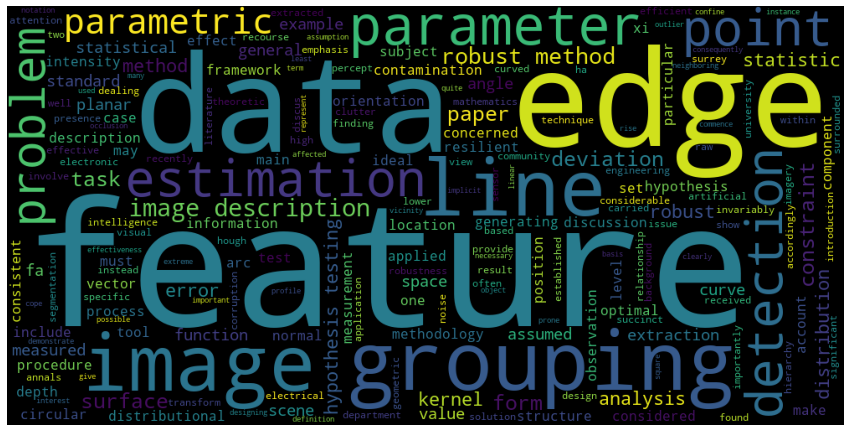

In [20]:
x=[]
for word in words_list:
    if word !="fig":
        x.append(word)
  
wordcloud = WordCloud(width=1000, height=500, regexp=r"\w[\w' ]+").generate("+".join(x[:1000]))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
y=[]
import seaborn as sns
m={x for x in words_list if words_list.count(x) > 1}
m1=sorted(m)
for x in m1:
  o=list(x)
  if 1<len(o)<4:
    
    print(y)

In [22]:
import googletrans
from googletrans import Translator
import pandas as pd

ModuleNotFoundError: ignored

In [ ]:
!pip install googletrans

In [23]:
m={x for x in words_list if words_list.count(x) > 1}
m=sorted(m)
long_words = [w for w in m if len(w) > 3]
sorted(long_words)
len(long_words)

491

In [ ]:
x=0
myDict=dict()
for val in long_words:
    x+=1
    for ele in range(x, x+1): 
        myDict.setdefault(ele, []).append(val)
print(myDict)



In [28]:
words_en=[]
words_tr=[]
long_words={x for x in words_list if words_list.count(x) > 1}
long_words=sorted(long_words)
long_words = [w for w in long_words if len(w) > 6]
for word in long_words:
    words_en.append(word)
print(words_en)


['according', 'account', 'accumulator', 'accuracy', 'accurate', 'accurately', 'achieve', 'addition', 'adopted', 'algorithm', 'alternatively', 'amplitude', 'analysis', 'another', 'application', 'applied', 'approach', 'appropriate', 'associated', 'assumed', 'assumption', 'average', 'because', 'benefit', 'between', 'boundary', 'calculate', 'calculated', 'calculating', 'candidate', 'capture', 'central', 'certain', 'circular', 'classified', 'clearly', 'clutter', 'combination', 'community', 'comparison', 'component', 'concerned', 'condition', 'consider', 'considered', 'considering', 'consistent', 'constant', 'constrained', 'constraint', 'contamination', 'contrast', 'convolution', 'correct', 'corresponding', 'criterion', 'current', 'decision', 'defined', 'density', 'derivative', 'derived', 'description', 'designing', 'desirable', 'detection', 'detector', 'determine', 'development', 'deviation', 'difference', 'different', 'difficult', 'dimensional', 'directly', 'discussion', 'distance', 'distr

In [ ]:
import csv

# open the file in the write mode
f = open('calısma.csv', 'w')

# create the csv writer
writer = csv.writer(f)

# write a row to the csv file
writer.writerows(words_en)

# close the file
f.close()

In [29]:
import re

clean_quiet = re.compile('[^aâeêıîioôöuûü]')
lower_vowel = 'aâeêıîioôöuûü'
lower_quiet = 'bcçdfgğhjklmnprsştvyzqwx'


# Gelen kelimeyi, sesli harfler "1", sessiz harfler "0" olmak üzere sayıya çevirir
# String olarak geri döndürür
def wordtoten(word):
    word = to_lower(word)
    translate_wtonum_0 = str.maketrans(lower_quiet, len(lower_quiet) * '0')
    translate_wtonum_1 = str.maketrans(lower_vowel, len(lower_vowel) * '1')
    word = (word.translate(translate_wtonum_1)).translate(translate_wtonum_0)

    return word


# Gelen string(yazı) veriyi küçük harfe çevirir.
def to_lower(word):
    tolower_text = (word.replace('İ', 'i'))
    tolower_text = (tolower_text.replace('I', 'ı'))
    tolower_text = tolower_text.lower()
    return tolower_text


# Gelen string(yazı) veriyi büyük harfe çevirir.
def to_upper(word):
    toupper_text = (word.replace('i', 'İ'))
    toupper_text = (toupper_text.replace('ı', 'I'))
    toupper_text = toupper_text.upper()
    return toupper_text


def spellword(word: str):
    syllable_list = []
    # Bulduğumuz heceleri bu listede toplayacağız.
    syllable = ""
    # Harfleri bir hece oluşturana kadar "syllable" değişkenine yazacağız.
    gword = to_lower(word)
    # "gword" değişkenine kelimemizin küçük harfe çevrilmiş halini atıyoruz.
    tword = wordtoten(word)
    # "tword" değişkenine kelimemizin sayılara çevrilmiş halini atıyoruz.
    if tword.startswith('000') or tword.endswith('000'):
        return False

    tword = tword + '.....'
    len_vowel = tword.count('1')
    counter = 0

    for i, char in enumerate(tword):
        if counter > 0:
            counter -= 1
            continue

        if char == '.':
            if syllable and syllable.count('1') == 1:
                syllable_list.append(gword[:len(syllable)])
            break
        elif char == '0':
            syllable = syllable + char
            if syllable and (syllable == '000'):
                break
            continue
        elif char == '1':
            syllable = syllable + char
            x = len(syllable)
            if (tword[x:x + 2] == '01') or (tword[x:x + 2] == '10') or (tword[x:x + 2] == '1.'):
                syllable_list.append(gword[:x])
                gword = gword[x:]
                tword = tword[x:]
                syllable = ''
                continue
            elif tword[x:x + 3] == '001':
                syllable_list.append(gword[:x + 1])
                gword = gword[x + 1:]
                tword = tword[x + 1:]
                syllable = ''
                counter += 1
                continue
            elif tword[x:x + 3] == '00.':
                syllable_list.append(gword[:x + 2])
                del gword
                break
            elif tword[x:x + 4] == '0001':
                syllable_list.append(gword[:x + 2])
                gword = gword[x + 2:]
                tword = tword[x + 2:]
                syllable = ''
                counter += 2
                continue
            elif tword[x:x + 5] == '00001':
                syllable_list.append(gword[:x + 2])
                gword = gword[x + 2:]
                tword = tword[x + 2:]
                syllable = ''
                counter += 2
                continue
    if (''.join(syllable_list) == word) and (len_vowel == len(syllable_list)):
        return syllable_list
    else:
        return False


# Küçük sesli uyumu kontrolü. True yada False döndürür.
def trmi_ksucontrol(word):
    # Düz Sesliler: a, e, ı, i
    # Yuvarlak Sesliler: o, ö, u, ü
    # Dar Sesli Harfler: ı, i, u, ü
    # Geniş Sesli Harfler: a, e, o, ö
    # Bir sözcükte düz ünlü harflerden  (a, e, ı, i) sonra yine düz ünlü harfler(a, e, ı, i) gelebilir.
    # Bir sözcükte yuvarlak ünlü harflerden (o, ö, u, ü) sonra düz/geniş (a, e) ve dar/yuvarlak (u, ü) sesli
    #  harfler gelebilir.
    # Küçük ünlü uyumunda her bir sesli harf kendinden önceki sesli harften sorumludur.
    # Küçük sesli uyumu kontrolü
    # sonu “ol” ya da “alp” ile biten
    # yabancı sözcüklere getirilen ekler bu kurala uymaz ve ince sesli içerirler. Bu
    # duruma örnek olarak “kalp” ve “gol” sözcükleri verilebilir.
    # • -yor, -ken , -ki, -leyin, -imtrak, -gil ekleri sesli uyumuna uymazlar.
    if not word:
        return True

    duz_sesliler = 'aâeêıîi'
    yuvarlak_sesliler = 'oôöuûü'
    duz_genis_dar_yuvarlak = 'aâeêuûü'

    lower_word = to_lower(word).strip()
    clr_word = clean_quiet.sub('', lower_word)
    lenght_vow = len(clr_word)

    i = 1
    ksu = True
    while i < lenght_vow:
        i += 1
        if (clr_word[i - 2] in duz_sesliler) and (clr_word[i - 1] not in duz_sesliler):
            ksu = False
            break

        if (clr_word[i - 2] in yuvarlak_sesliler) and (clr_word[i - 1] not in duz_genis_dar_yuvarlak):
            ksu = False
            break

    return ksu


# Büyük sesli uyumu kontrolü. True yada False döndürür.
def trmi_bsucontrol(word):
    # Kural olarak; ince seslilerden sonra ince sesliler, kalın seslilerden sonra kalın sesliler gelir
    # ince sesliler = e,i,ö,ü
    # kalın sesliler = a,ı,o,u
    # Büyük sesli uyumu kontrolü
    # sonu “ol” ya da “alp” ile biten
    # yabancı sözcüklere getirilen ekler bu kurala uymaz ve ince sesli içerirler. Bu
    # duruma örnek olarak “kalp” ve “gol” sözcükleri verilebilir.
    # • -yor, -ken , -ki, -leyin, -imtrak, -gil ekleri sesli uyumuna uymazlar.
    if not word:
        return True

    kalin_unlu_harfler = 'aâıîoôuû'
    ince_unlu_harfler = 'eêiöü'

    lower_word = to_lower(word)
    clr_word = clean_quiet.sub('', lower_word)
    lenght_vow = len(clr_word)

    if not clr_word:
        return True

    bsu = True
    if (clr_word[0] in kalin_unlu_harfler) and (lenght_vow > 1):
        for i in clr_word[1:]:
            if i not in kalin_unlu_harfler:
                bsu = False
                break

    if (clr_word[0] in ince_unlu_harfler) and (lenght_vow > 1):
        for i in clr_word[1:]:
            if i not in ince_unlu_harfler:
                bsu = False
                break
    return bsu


def trmi_nb_uyumu(word):
    # Türkçe’de birleşik sözcük ve yer adları dışında n ve b sessizleri yan yana bulunmaz.
    if 'nb' in word:
        nb = False
    else:
        nb = True
    return nb


def trmi_son_sessiz_uyumu(word):
    iword = to_lower(word)
    # Türkçe bir sözcüğün sonunda süreksiz yumuşak sessiz (b, c, d, g) bulunmaz, böyle sesler süreksiz sert
    # sessizlere (p, ç, t, k) dönüşür.
    sys = ('b', 'c', 'd', 'g')
    if iword[-1] in sys:
        sys = False
    else:
        sys = True
    return sys


def trmi_ilk2_sessiz_uyumu(word):
    iword = to_lower(word)
    nword = wordtoten(iword)
    # Türkçe’de sözcük iki sessiz harf ile başlayamaz.
    if nword[:2] == '00':
        first_two_letters = False
    else:
        first_two_letters = True

    return first_two_letters


def trmi_son3_sessiz_uyumu(word):
    iword = to_lower(word)
    nword = wordtoten(iword)
    # Türkçe’de sözcük üç sessiz harf ile bitemez.
    if nword[-3:] == '000':
        last_three_letters = False
    else:
        last_three_letters = True

    return last_three_letters


def trmi_son2_sessiz_uyumu(word):
    iword = to_lower(word)
    nword = wordtoten(iword)
    # Türkçe’de sözcük ve hece sonlarında bulunabilecek sessiz çiftleri
    last_two_letters = {'l': 'çkpt',
                        'n': 'çkt',
                        'r': 'çkpst',
                        's': 't',
                        'ş': 't'}

    if nword.endswith('00') and (iword[-2] in last_two_letters):
        second_letter = iword[-2]
        if iword[-1] in last_two_letters[second_letter]:
            last_two = True
        else:
            last_two = False
    else:
        last_two = True

    return last_two


def sessiz_uyumu(word):
    iword = to_lower(word)
    nword = wordtoten(iword)

    # Bu kurala göre, sert sessizlerden
    # sonra sert sessiz veya sert karşılığı bulunmayan yumuşak sessiz gelebilir. “ç - f - h - k
    # - p - s - ş – t” harflerinden sonra “ç - f - h - k - p - s - ş - t - l - m - n - r – y” harfleri
    # gelmelidir.
    #
    # Sert karşılığı bulunmayan yumuşak sessizlerden sonra tüm sessizler
    # gelebilir. “l - m - n - r – y” harflerinden sonra bütün sessiz harfler gelebilir. Sert
    # karşılığı bulunan yumuşak sessizlerden sonra yumuşak sessizler gelebilir. “b - c - d -
    # g - ğ - j - v – z” harflerinden sonra “b - c - d - g - ğ - j - v - z - l - m - n - r – y”
    # harfleri gelmelidir.

    sert_sessiz = ('ç', 'f', 'h', 'k', 'p', 's', 'ş', 't')
    sert_sessiz_kar = ('ç', 'f', 'h', 'k', 'p', 's', 'ş', 't', 'l', 'm', 'n', 'r', 'y')
    yum_sessiz = ('b', 'c', 'd', 'g', 'ğ', 'j', 'v', 'z')
    yum_sessiz_kar = ('b', 'c', 'd', 'g', 'ğ', 'j', 'v', 'z', 'l', 'm', 'n', 'r', 'y')
    sksiz_yumusak_sessiz = ('l', 'm', 'n', 'r', 'y')

    ss_sessiz = False
    if '00' in nword:
        nnword = nword
        iiword = iword
        while '00' in nnword:
            mt = re.search('00', nnword)
            x, y = mt.span()
            iiword = iiword[x:]

            if iiword[0] in sksiz_yumusak_sessiz:
                iiword = iiword[y:]
                nnword = nnword[y:]
                ss_sessiz = True
                continue

            if iiword[0] in sert_sessiz and iiword[1] in sert_sessiz_kar:
                iiword = iiword[y:]
                nnword = nnword[y:]
                ss_sessiz = True
                continue

            if iiword[0] in yum_sessiz and iiword[1] in yum_sessiz_kar:
                iiword = iiword[y:]
                nnword = nnword[y:]
                ss_sessiz = True
                continue

            if ss_sessiz is not True:
                ss_sessiz = False
                break
    return ss_sessiz